In [30]:
import os
import random
from typing import Tuple

import imageio.v3 as iio
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from prepare_data.utils import create_folder, get_random_image
from prepare_data.labels import get_box_cords

ModuleNotFoundError: No module named 'pandas'

In [24]:
def show_defects(image: np.ndarray, defects: dict):
    fig, ax = plt.subplots(1, 2, figsize=(10, 15))
    ax[0].imshow(image)
    
    ax[1].imshow(image)
    y_shape, x_shape, _ = image.shape
    for label, cords in defects.items():
        for cord in cords:
            
            x_center = cord[0] * x_shape
            y_center = cord[1] * y_shape
            width = cord[2] * x_shape
            height = cord[3] * y_shape
            
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)

            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax[1].add_patch(rect)


In [25]:
path_to_data = r'../data/prepare_data'

image_path, label_path = get_random_image(path_to_data)
print(image_path)

../data/prepare_data/images/5 (164).jpg


{'0': [[0.387905, 0.859577, 0.030544, 0.050529], [0.350947, 0.871328, 0.043372, 0.057579], [0.274588, 0.581081, 0.026268, 0.050529], [0.323152, 0.477673, 0.017104, 0.036428], [0.37752, 0.4953, 0.023213, 0.036428], [0.629505, 0.643361, 0.023824, 0.059929], [0.575137, 0.700353, 0.015272, 0.039953], [0.350031, 0.23208, 0.085522, 0.283196]], '2': [[0.477703, 0.364277, 0.156384, 0.115159]]}


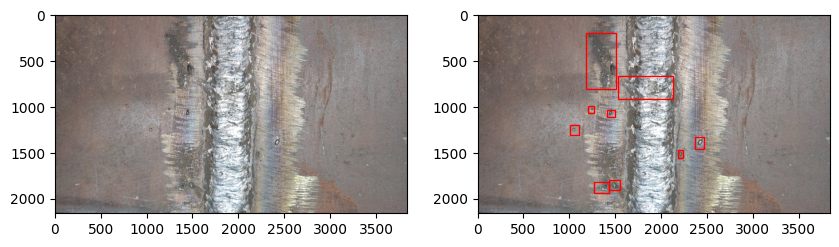

In [26]:
image = iio.imread(image_path)
defects = get_box_cords(label_path)
print(defects)

show_defects(image, defects)

## Generate markup images

In [27]:
def add_labels_to_image(image: np.ndarray, defects: dict, path_to_save: str, color_map: dict):
    fig, ax = plt.subplots(1)
    
    ax.imshow(image)
    y_shape, x_shape, _ = image.shape
    for label, cords in defects.items():
        for cord in cords:
            
            x_center = cord[0] * x_shape
            y_center = cord[1] * y_shape
            width = cord[2] * x_shape
            height = cord[3] * y_shape
            
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)

            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
            ax.add_patch(rect)
            
            # top_left_x = x_center - width / 2
            # top_left_y = y_center - height / 2
            # 
            # ax.text(top_left_x, top_left_y + 5, label, color=color_map[label], fontsize=2, ha='left', va='bottom')

    
    ax.axis('off')
    plt.savefig(path_to_save, bbox_inches='tight', pad_inches=0, dpi=1024)
    plt.close(fig)


In [28]:
data_dir = '../data/prepare_data'
path_to_save = '../data/generate_images'
create_folder(path_to_save)

5 (102).jpg {'1': [[0.51741, 0.111046, 0.040318, 0.052879]]}
7 (34).jpg {'0': [[0.049175, 0.291422, 0.072694, 0.054054], [0.039707, 0.599295, 0.039096, 0.028202], [0.088577, 0.549941, 0.026878, 0.018801], [0.767868, 0.595182, 0.120953, 0.027027]], '2': [[0.59102, 0.473561, 0.13989, 0.110458]], '3': [[0.791692, 0.371915, 0.087966, 0.052879], [0.681124, 0.388954, 0.061087, 0.035253], [0.981368, 0.342538, 0.032376, 0.038778]]}
12 (22).jpg {'1': [[0.473732, 0.714454, 0.037263, 0.051704]]}
6 (27).jpg {'1': [[0.673794, 0.473561, 0.064753, 0.082256]]}
8 (30).jpg {'2': [[0.555589, 0.077556, 0.161881, 0.079906]]}
8 (28).jpg {'2': [[0.539096, 0.087544, 0.203421, 0.076381]]}
11 (63).jpg {'2': [[0.455101, 0.472973, 0.161271, 0.132785]]}
9 (20).jpg {'2': [[0.523824, 0.591657, 0.24496, 0.116334], [0.528711, 0.674501, 0.049481, 0.042303]], '3': [[0.668907, 0.461222, 0.029322, 0.050529], [0.690287, 0.560517, 0.026878, 0.039953]], '1': [[0.644777, 0.213866, 0.040929, 0.423032]]}
9 (33).jpg {}
6 (70).jp

KeyboardInterrupt: 

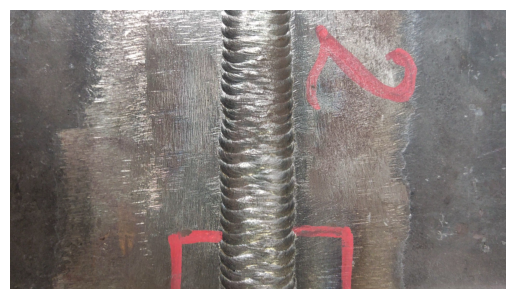

In [29]:
color_map = {'0': 'purple',
             '1': 'orange',
             '2': 'green',
             '3': 'blue',
             '4': 'red'}

for root, dirs, files in os.walk(os.path.join(data_dir, 'images')):
    for file in files:
        path_to_image = os.path.join(root, file)
        path_to_label = os.path.join(data_dir, 'labels', file.replace('jpg', 'txt'))
      
        if file.replace('.jpg', '_label.jpg') in os.listdir(path_to_save):
            continue
            
        image = iio.imread(path_to_image)
        defects = get_box_cords(path_to_label)
      
        print(file, defects)
        add_labels_to_image(image, defects, os.path.join(path_to_save, file.replace('.jpg', '_label.jpg')), color_map)
        
        # break
    # break

In [ ]:
for root, dirs, files in os.walk(os.path.join(data_dir, 'images')):
    for file in files:
        path_to_image = os.path.join(root, file)
        path_to_label = os.path.join(data_dir, 'labels', file.replace('jpg', 'txt'))
